In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Problem 1

The following table shows the gray scale pixel values of a video of a one-dimensional space (e.g., along a one-lane road segment) at different time stamps.

In [132]:
traj = np.array([[22, 23, 9, 1, 8, 8, 3, 1, 0, 2, 3],
           [4, 18, 15, 1, 2, 0, 0, 4, 6, 4, 3],
           [3, 3, 22, 20, 1, 5, 1, 7, 1, 0, 5],
           [5, 5, 5, 3, 22, 25, 6, 7, 8, 2, 8],
           [3, 4, 9, 1, 5, 2, 24, 21, 0, 1, 5],
           [4, 5, 0, 6, 1, 5, 3, 9, 2, 20, 15]
          ])
traj

array([[22, 23,  9,  1,  8,  8,  3,  1,  0,  2,  3],
       [ 4, 18, 15,  1,  2,  0,  0,  4,  6,  4,  3],
       [ 3,  3, 22, 20,  1,  5,  1,  7,  1,  0,  5],
       [ 5,  5,  5,  3, 22, 25,  6,  7,  8,  2,  8],
       [ 3,  4,  9,  1,  5,  2, 24, 21,  0,  1,  5],
       [ 4,  5,  0,  6,  1,  5,  3,  9,  2, 20, 15]])

## a) Please identify the background image. (15 pt)



### Method one: Trimmean

The key idea is to get the mean without the smallest and the largest number. The rationale is that the background stays the same, so the largest and the smallest one are more likely to be the moving objects. 

In [133]:
stats.trim_mean(traj, 0.25)

array([4.  , 8.  , 9.5 , 2.75, 4.  , 5.  , 3.25, 6.75, 2.25, 2.25, 5.25])

### Method two: identify the moving object first (the cell with largest value)

To get the background image, my method is as follows: for each column, get the average of cells without the largest cell. The rationale behind this is that the cell(s) with largest values are the moving object. To get the background image, I need to remove it. 

In [134]:
# column wise sum: 
col_sum = np.sum(traj, axis = 0)
col_sum

array([41, 58, 60, 32, 39, 45, 37, 49, 17, 29, 39])

In [135]:
# largest value in each column
col_max = np.max(traj, axis = 0)
col_max

array([22, 23, 22, 20, 22, 25, 24, 21,  8, 20, 15])

In [136]:
# background image: 
((col_sum - col_max )/ 5)

array([3.8, 7. , 7.6, 2.4, 3.4, 4. , 2.6, 5.6, 1.8, 1.8, 4.8])

## b) Please identify the object on each frame. (15 pt)

For each frame, I consider the exceptionally large value cells as the moving object:

- First frame: 1 & 2 cell
- Second frame: 2 & 3 cell 
- Third frame: 3 & 4 cell
- Fourth frame: 5 & 6 cell
- Fifth frame:  7 & 8 cell
- Sixth frame: 10 & 11 cell

![](objects.png)

## c) Please plot the identified trajectory over the time-space diagram. (15 pt)

In [137]:
times = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
pix = [0.5, 1, 1.5, 2.5, 3.5, 5]

Text(0.5, 1.0, 'Trajectory over time-space diagram')

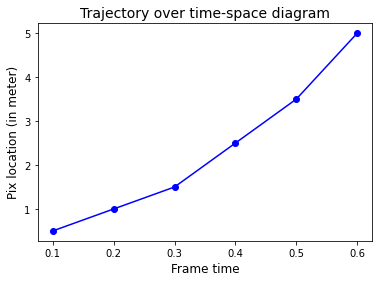

In [138]:
plt.plot(times, pix, marker='o', color='b',)
plt.xlabel('Frame time', fontsize = 12)
plt.ylabel('Pix location (in meter)', fontsize = 12)
plt.title('Trajectory over time-space diagram', fontsize = 14)

## d) Please calculate speed and acceleration at each time point. (15 pt)

add units

- time # 1, speed: (1-0.5)/0.1 = 5 $m/s$ (meter/second), acceleration: do not have enough information 
- time # 2, spped: (1.5-1)/0.1 = 5 $m/s$, acceleration: (5-5) / 0.1 = 0 $m/s^2$
- time # 3, speed: (2.5-1.5)/0.1 = 10 $m/s$, acceleration: (10-5)/0.1 = 50 $m/s^2$
- time # 4: speed: (3.5-2.5)/0.1 = 10 $m/s$, acceleration: (10-10)/0.1 = 0 $m/s^2$
- time # 5: speed: (5-3.5)/0.1 = 15 $m/s$, acceleration: (15-10)/0.1 = 50 $m/s^2$

# Problem 2

In [139]:
img = np.array([[2, 3, 2, 0, 0, 4], 
                      [3, 23, 53, 53, 23, 2],
                     [1, 32, 0, 3, 25, 0],
                      [0, 25, 4, 1, 23, 0],
                      [0, 25, 2, 4, 23, 3],
                      [2, 42, 23, 23, 25, 1],
                      [2, 1, 4, 3, 0, 2],
                      [0,0,0,4,4,3]
                     ])
img

array([[ 2,  3,  2,  0,  0,  4],
       [ 3, 23, 53, 53, 23,  2],
       [ 1, 32,  0,  3, 25,  0],
       [ 0, 25,  4,  1, 23,  0],
       [ 0, 25,  2,  4, 23,  3],
       [ 2, 42, 23, 23, 25,  1],
       [ 2,  1,  4,  3,  0,  2],
       [ 0,  0,  0,  4,  4,  3]])

In [140]:
img.shape

(8, 6)

In [141]:
# vertical filter
v_filter = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1],
])

# horizontal filter
h_filter = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])

In [142]:
# chunks of codes taken from
# https://www.math.purdue.edu/~bradfor3/ProgrammingFundamentals/NumPy/matrices/

def convolve_1d(array, kernel):
    ks = kernel.shape[0]
    final_length = array.shape[0] - ks + 1
    return np.array([(array[i:i+ks]*kernel).sum() for i in range(final_length)])

def convolve_2d(array, kernel):
    ks = kernel.shape[1]
    final_height = array.shape[1] - ks + 1
    return np.array([convolve_1d(array[:, i:i+ks], kernel) for i in range(final_height)]).T

## a) Please identify the vertical edges (20 pt)

In [143]:
convolve_2d(img, v_filter)

array([[-49,   2,   7,  50],
       [-53,  23, -14,  55],
       [ -5,  74, -65,   5],
       [-27,  64, -42,  24],
       [-25,  38, -19,  24],
       [-23,  13,  -2,  24]])

In grayscale, $0$ indicates black. Higher values indicate white. After applying the filter, the desired edges will become white. So I only need to find the higher values in the output above. The 2nd and the 4th column are white. 

To be honest, this is where I got a little bit confused. I know the above operation is correct, but I do not know how to identify the edges in the original image according to the above results. In fact, the vertical edges in the original image are very obvious:

![](vertical.png)

## b) Please identify the horizontal edges (20 pt)

In [144]:
convolve_2d(img, h_filter)

array([[-26, -30, -26, -24],
       [ 50,  99, 101,  54],
       [  6,   4,  -1,  -2],
       [-38, -58, -43, -25],
       [ 20,  23,  22,  25],
       [ 67,  84,  63,  38]])

Same as above. I have the results after the covolution operation but I do not know how to get the answer based on it. I got the answer directly from the original grayscale image.

![](horizontal.png)